20
finished survey load
now load DEM DATA
18
DEM load complete
load int. Bathy
IB loaded
get ready to start loop
this is what loop of the survey we are on:
0
DEM
survey bath loop
int Bathy


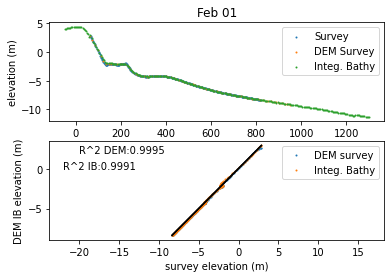

this is what loop of the survey we are on:
1
DEM
survey bath loop
int Bathy


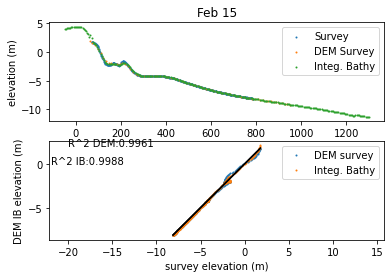

this is what loop of the survey we are on:
2
DEM
survey bath loop
int Bathy


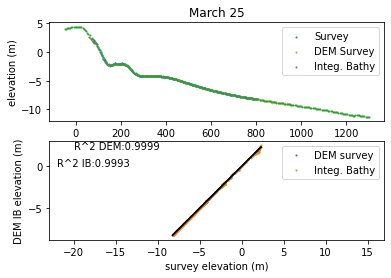

this is what loop of the survey we are on:
3
DEM
survey bath loop
int Bathy


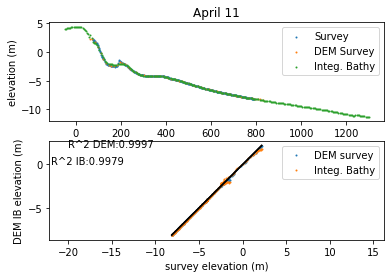

this is what loop of the survey we are on:
4
DEM
survey bath loop
int Bathy


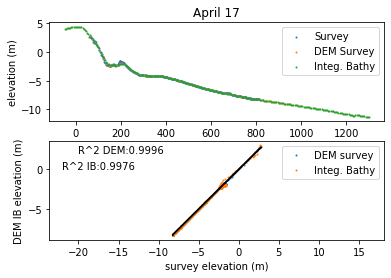

this is what loop of the survey we are on:
5
DEM
survey bath loop
int Bathy


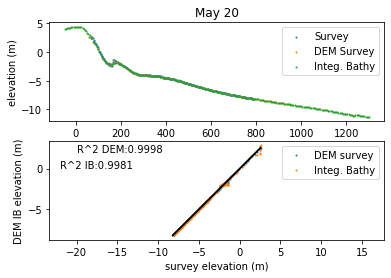

this is what loop of the survey we are on:
6
DEM
survey bath loop
int Bathy


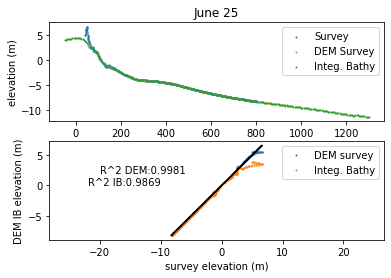

this is what loop of the survey we are on:
7
DEM
survey bath loop
int Bathy


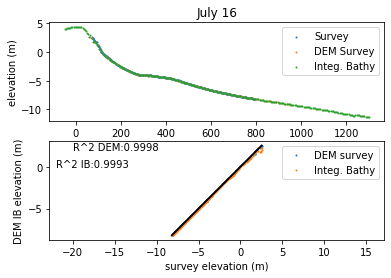

this is what loop of the survey we are on:
8
survey bath loop
this is what loop of the survey we are on:
9
DEM
survey bath loop
int Bathy


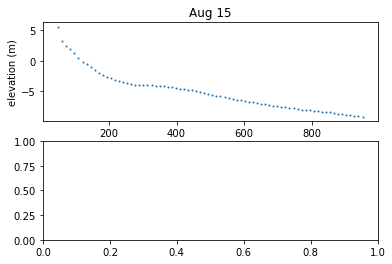

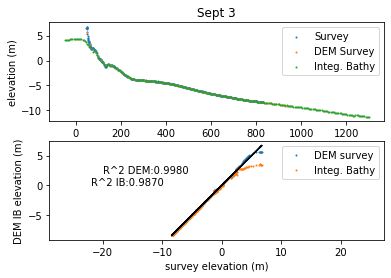

this is what loop of the survey we are on:
10
DEM
survey bath loop
int Bathy


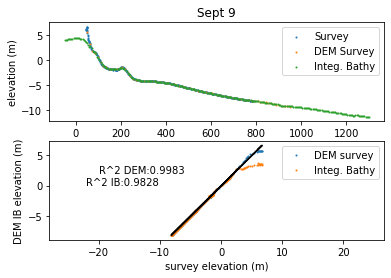

this is what loop of the survey we are on:
11
DEM
survey bath loop
int Bathy


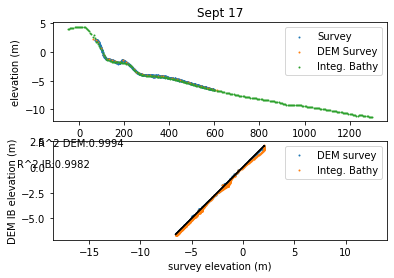

this is what loop of the survey we are on:
12
DEM
survey bath loop
int Bathy


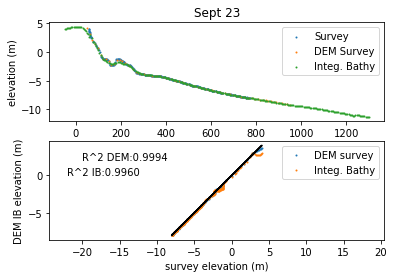

this is what loop of the survey we are on:
13
survey bath loop
this is what loop of the survey we are on:
14
survey bath loop
this is what loop of the survey we are on:
15
survey bath loop
int Bathy


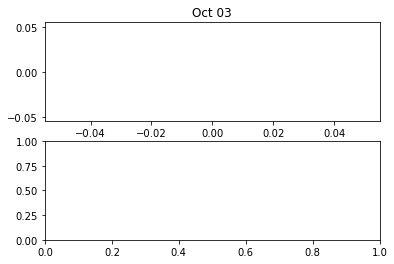

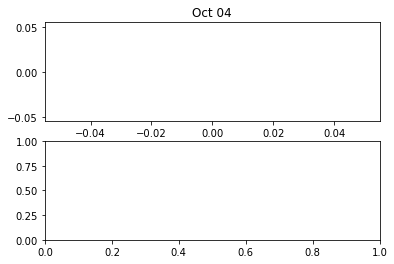

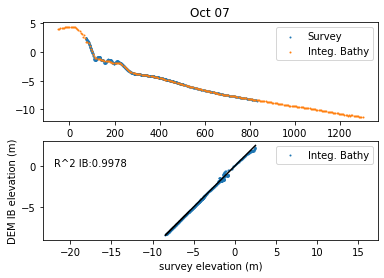

this is what loop of the survey we are on:
16
DEM
survey bath loop
int Bathy


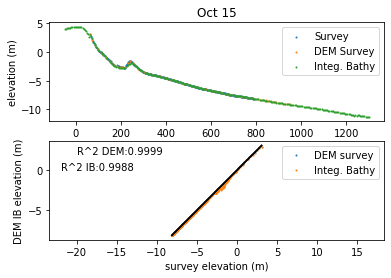

this is what loop of the survey we are on:
17
DEM
survey bath loop
int Bathy


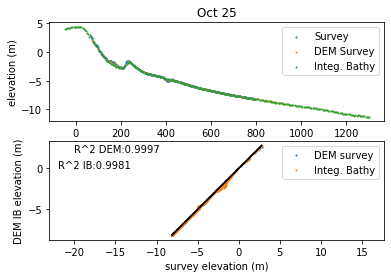

this is what loop of the survey we are on:
18
DEM
survey bath loop
int Bathy


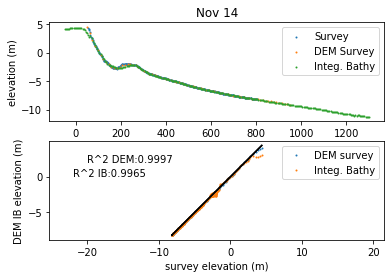

this is what loop of the survey we are on:
19
DEM
survey bath loop
int Bathy


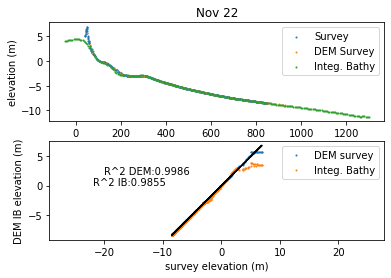

this is what loop of the survey we are on:
20
DEM
survey bath loop
int Bathy


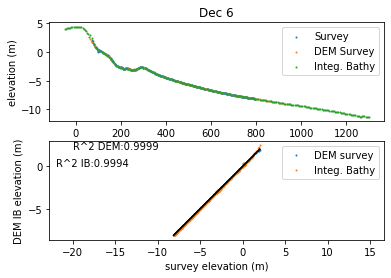

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jul 15 11:34:42 2021

@author: laure
"""
# hopfully this code will make 21 subplots and not look like crap

from netCDF4 import Dataset, num2date 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from datetime import datetime
import netCDF4 as nc4
import warnings
warnings.filterwarnings('ignore')

#SURVEY DATA
import os
files = os.listdir("C:/Users/laure/OneDrive/Documents/ERDC_FRF/survey")   
filefull=["C:/Users/laure/OneDrive/Documents/ERDC_FRF/survey/" + i for i in files]
lfilesurvey=len(filefull)
print(lfilesurvey)
firstDataset = nc4.Dataset(filefull[0])
#print(filefull[0])
#print(filefull[-1])
timel=['Feb 01', 'Feb 15', 'March 25', 'April 11', 'April 17', 'May 20','June 25','July 16','Aug 15','Sept 3','Sept 9','Sept 17','Sept 23','Oct 03','Oct 04','Oct 07', 'Oct 15', 'Oct 25', 'Nov 14','Nov 22','Dec 6']
elv = []
time = []
xfrf=[]
yfrf=[]
pnum=[]
snum=[]

surveynum=np.arange(1159,1180)
x960 = []
elv960 = []
s960 = []
xsur=np.empty(21,dtype=object)
elvsur=np.empty(21,dtype=object)
for i, val in enumerate(filefull):
        #fig, axs = plt.subplots(2)
        currDataset = nc4.Dataset(val)
        time.append(np.array(currDataset['time'][:]))
        xfrf.append(np.array(currDataset['xFRF'][:]))
        yfrf.append(np.array(currDataset['yFRF'][:]))
        pnum.append(np.array(currDataset['profileNumber'][:]))
        snum.append(np.array(currDataset['surveyNumber'][0]))
        elv.append(np.array(currDataset['elevation'][:]))
        inds = np.where(pnum[i]==960)
        x960.append(xfrf[i][inds])
        #s960.append(snum[i])
        s960.append(snum[i])
        currentSN=snum[i]
    
        elv960.append(elv[i][inds])
        sa960=np.array(s960)
print('finished survey load')
print('now load DEM DATA')
#####Load DEM DATA
import os
files2 = os.listdir("C:/Users/laure/OneDrive/Documents/ERDC_FRF/DEM/2019")

    
filefull2=["C:/Users/laure/OneDrive/Documents/ERDC_FRF/DEM/2019/" + i for i in files2]
ldem=len(filefull2)
print(ldem)

firstDataset2 = nc4.Dataset(filefull2[0])
yFRF = firstDataset2["yFRF"][:]
xFRF = firstDataset2["xFRF"][:]
ind_956 = np.where(yFRF==956) #choose survey location

elevation956 = []
time2 = []
z_956 = []
surv=[]



for i, val in enumerate(filefull2):
    currDataset2 = nc4.Dataset(val)
    time2.append(currDataset2['time'][:])
    elevation956.append(currDataset2['elevation'][0,yFRF==956,:].flatten())
    surv.append(currDataset2['surveyNumber'][:]) 
    
    
#plt.rcParams['figure.figsize'] = [20, 10]
print('DEM load complete')
print('load int. Bathy')

#load intigrated Bathy Product

ibath=Dataset('https://chldata.erdc.dren.mil/thredds/dodsC/cmtb/integratedBathyProduct/survey/survey.ncml')

tt=ibath['time']
#l=len(tt)
#print(l)
timedm=num2date(tt[:],units=tt.units,only_use_cftime_datetimes=False,only_use_python_datetimes=True)
dtstart=datetime(2019, 1, 1, 0, 0, 0)
dtend=datetime(2020, 1, 1, 0, 0, 0)
dnstart = dates.date2num(dtstart)
dnend = dates.date2num(dtend)
ptime= dates.date2num(timedm)
dates = (ptime >= dnstart) & (ptime <= dnend)



findd = np.where(dates > 0)
findd=findd[0]
#print(find)
snum2=ibath['surveyNumber'][:]
xfrf2=ibath['xFRF'][:]
yfrf2=ibath['yFRF'][:]
time2=ibath['time'][:]

time2019=time2[dates]
survey2019=snum2[dates]
ind_960 = np.where(yfrf2==960.0)
index960=ind_960[0]
print('IB loaded')
print('get ready to start loop')

#start loop process

for ii, val in enumerate(surveynum):
        fig, (axs1, axs2) = plt.subplots(2)
        print('this is what loop of the survey we are on:')
        print(ii)
        
        axs1.set_title(timel[ii])
           
        findsurv=np.where(val==sa960)
        findsurvval=findsurv[0]
            
        
        if len(findsurvval)>0:
                surveyscalar=np.asscalar(findsurvval)
                x960np=np.array(x960)
                x960here=x960np[surveyscalar]
                elv960np=np.array(elv960)
                elv960here=elv960np[surveyscalar]
                axs1.scatter(x960here,elv960here,s=1,label='Survey')
                #axs[iii].axis('equal')
                xsur[ii]=x960[surveyscalar]
                elvsur[ii]=elv960[surveyscalar]
 #loop of dem               

  
 
       
        #for i2 in range(len(filefull2)):
        #if ii<=len(filefull2):
            #curr_elev = elevation956[ii]
            #curr_surv = surv[ii]
        findsvdem=np.where(surv==val)
        findsvdem=findsvdem[0]
        if len(findsvdem)>0:
            #for s in curr_surv:
               # if s==val:
                    demscalar=np.asscalar(findsvdem)
                    sh=np.shape(xsur[ii])
                    curr_elev=elevation956[demscalar]
                    axs1.scatter(xFRF,curr_elev,s=1,label='DEM Survey')
                    axs1.set_xlabel('x (m)')
                    axs1.set_ylabel('elevation (m)')
                    #axs[ii].axis('equal')
                    if xsur[ii] is not None:
                        ax=(xsur[ii][:])
                        aelv=(elvsur[ii][:])
                        deminterp = np.interp(ax,xFRF,curr_elev)
                      
                     
                        axs2.scatter(aelv,deminterp,s=1, label='DEM survey')
                        corr_matrixdem = np.corrcoef(aelv, deminterp)
                        m, b = np.polyfit(aelv,deminterp, 1)
                        axs2.plot(aelv, m*aelv+b,'k-')
                        corrdem = corr_matrixdem[0,1]
                        R_sqdem = corrdem**2
                        print('DEM')
                        #print(ii)
                        #print(R_sqdem)
                        #rnd = round(R_sqdem, 4)
                        axs2.axis('equal')
                        #axs2.set_title(timel[ii])
                        axs2.set_xlabel('survey elevation (m)')
                        axs2.set_ylabel('DEM IB elevation (m)')
                        #label = f"({rnd})"
                        axs2.text(-20, 2, "R^2 DEM:{:.4f}".format(R_sqdem) )
                       
#survey for int. Bathy                    
        print('survey bath loop') 
        #if ii<=len(survey2019):
        findsv=np.where(snum2==val)
        findsv=findsv[0]
        if len(findsv)>0:
              
            elv2019ib=ibath['elevation'][findsv,index960,:]
            sh2=np.shape(xsur[ii])
            allx=(xsur[ii][:])
            allelv=(elvsur[ii][:])
            axs1.scatter(xfrf2,elv2019ib,s=1,label='Integ. Bathy')
            axs1.legend(loc='upper right')   
                
            if sh2 is not None:
                ibinterp = (np.interp(allx,xfrf2,elv2019ib.flatten()))
                    
        
                axs2.scatter(allelv,ibinterp,s=1, label='Integ. Bathy')
                axs2.legend(loc='upper right')   
                m2, b2 = np.polyfit(allelv,ibinterp, 1)
                axs2.plot(allelv, m*allelv+b,'k-')
                
                corr_matrix = np.corrcoef(allelv, ibinterp)
                corr = corr_matrix[0,1]
                R_sqib = corr**2
                print('int Bathy')
                    #print(ii)
                    #print( R_sqib)
                   
                axs2.axis('equal')
                    #axs2.set_title(timel[ii])
                axs2.set_xlabel('survey elevation (m)')
                axs2.set_ylabel('DEM IB elevation (m)')
                axs2.text(-22, 0, "R^2 IB:{:.4f}".format(R_sqib) )
                plt.show()
#plt.title('1 to 1 2019 surveys')     
     